# Integrales en una dimensión

In [1]:
import time
print(' Última ejecución  ', time.asctime() )

 Última ejecución   Sat Mar 15 23:56:51 2025


### Objectivos

Introducir el concepto de suma de Riemann.

Mostrar algunos ejemplos

Recordar los métodos de integración

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

## Integrales 

En la siguiente figura, ¿Cómo calcularías el área bajo la gráfica y el eje x?

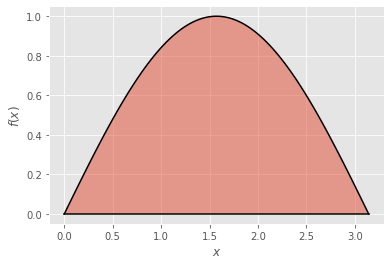

In [3]:
fun = lambda x : np.sin(x) 
a, b, size = 0., np.pi, 100
xs  = np.linspace(a, b, size)
plt.plot(xs, fun(xs), 'black'); plt.plot(xs, np.zeros(100), 'black');
plt.fill_between(xs, fun(xs), alpha = 0.5); plt.xlabel(r'$x$'); plt.ylabel(r'$f(x)$');

Vamos a definir primero qué es una partición de un intervalo.

####  Partición

Una partición, $P$ es un conjunto finito, $\{x_i; \; i = 0, \dots, n\}$, de puntos consecutivos en el intervalo $[a, b]$, de tal forma que $x_0 = a, \; x_n = b$ y $x_i < x_{i +1} \; \forall i$

El tamaño o  norma, $\| P \|$, de una partición será el tamaño del mayor de sus subintervalos, $\mathrm{máx}\{x_{i} - x_{i-1}; \; i = 1, \dots, n \}$

Una partición es más pequeña o más fina que otra si su norma es más pequeña.

Una partición es regular si $\Delta x_i = \delta, \; i = 1, \dots, n$.

### Suma de Riemann  

Sea $P$ una partición del intervalo $[a, b]$, y $t_i$ un punto en el subintervalo $[x_{i-1}, x_i]$ y $\Delta x_i = x_{i} - x_{i-1}$ con $i = 1, \dots, n$, y $f(x)$ una función, $\mathcal{R} \to \mathcal{R}$; llamamos suma de Riemann a la cantidad:

$$
\mathcal{S}(f, P) = \sum_{i=1}^n f(t_i) \, \Delta x_i
$$


In [4]:
def riemann_sum(fun, a, b, size = 100, draw = False):
    xs   = np.linspace(a, b, size)
    dx   = xs[1] - xs[0]  
    ts   = [xi + dx * np.random.uniform() for xi in xs[:-1]]
    sr   = sum([fun(ti) * dx for ti in ts])
    if (draw): 
        plt.bar(xs[:-1] + 0.5 * dx, fun(ts), dx)
        plt.plot(xs, fun(xs), c= 'black')
    return sr

*Explora:* Modifica en la siguiente celda la función, el intervalo, y especialmente el número de subintervalos de la partición regular.

Riemann Sum 1.99958


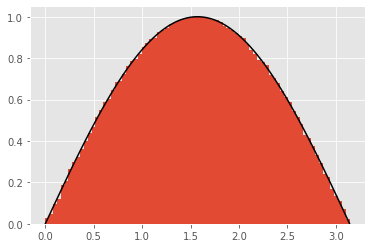

In [5]:
rsum = riemann_sum(np.sin, 0, np.pi, size = 80, draw = True)
print('Riemann Sum {:6.5f}'.format(rsum))

En la siguiente celda estudiamos la evolución de la suma de Riemann para particiones regulares cada vez más finas.

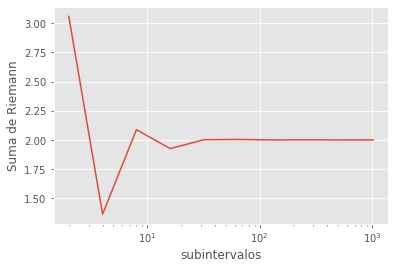

In [6]:
fun   = lambda x : np.sin(x)
a, b  = 0., np.pi
sizes = [int(2**i) for i in range(1, 11)]
srs   = [riemann_sum(fun, a, b, int(size)) for size in sizes]
plt.plot(sizes, srs); plt.xscale('log'); plt.ylabel('Suma de Riemann'); plt.xlabel('subintervalos');

Comprobamos que la suma de Riemann para particiones cada vez más finas converge a un determinado valor $S$.

### Integral de Riemman


Decimos que la función $f(x)$ es integrable Rienmann si existe un número $S$, o integral de Riemman, tal que $\forall \epsilon >0$, existe una partición $P_\epsilon$ del intervalo $[a, b]$, tal que para una partición más fina que $P_\epsilon$, y para cada elección de puntos $t_i$ del subintervalo $[x_{i-1}, \, x_i]$, se cumple:

$$
| \mathcal{S}(f, P) - S | < \epsilon
$$

El número $S$ se representa por:

$$
S = \int_a^b f(x) \; \mathrm{d}x
$$

La suma superior de Riemann se define:

$$
\mathcal{U}(f, \mathcal{P}) = \sum_{i=1}^n f(x'_i) \; \Delta x_i 
$$

donde ahora $x'_i$ es el valor del subintervalo $[x_{i-1}, \,x_{i}]$ donde la función $f(x)$ es *máxima*.

Y la suma inferior de Riemann:

$$
\mathcal{L}(f, \mathcal{P}) = \sum_{i=1}^n f(x'_i) \, \Delta x_i  
$$

donde ahora $x'_i$ es el valor del intervalo $[x_{i-1}, x_{i}]$ donde la función $f(x)$ es *mínima*.

Siempre se cumple:

$$
\mathcal{L}(f, \mathcal{P}) \le \mathcal{S}(f, \mathcal{P}) \le \mathcal{U}(f, \mathcal{P}) 
$$




### Primer teorema fundamental del cálculo integral

Sea $f(x)$ una función integrable Riemann en el intervalo $[a,b]$, definimos la función: 


$$
F(x) = \int_a^x f(x) \; \mathrm{d}x
$$

Si $f(x)$ es continua en $c \in (a, b)$, $F(x)$ es derivable en $c$ con derivada: $F'(c) = f(c)$


*Demostración:*

Por definición de derivada:
    
$$
F'(c) = \lim_{h\to0} \frac{F(c+h)-F(c)}{h} 
$$

En este caso, donde $h$ es pequeño.

$$
F(c+h)-F(c)  = \int_a^{c+h} f(x) \; \mathrm{d}x - \int_a^{c} f(x) \; \mathrm{d}x 
= \int_c^{c+h} f(x) \; \mathrm{d}x \simeq f(t) \, h
$$

Si consideramos $h$ suficientemente pequeño, damos la integral como la suma de Riemann en un intervalo $[c, c+h]$ con punto aletaorio $t$. Al hacer $h \to 0, \; t \to c$, y:

$$
F'(c) = f(c)
$$

### Segundo teorema fundamental del cálculo integral


Una función $F(x)$ se llama *primitiva* de una función $f(x)$ en un intervalo abierto $(a,b)$ si $F'(x) = f(x)$ para todo $x \in (a,b)$.

Dos primitivas de una funci\'on solo pueden diferir en una constante: $P(x) = F(x) + C$ 



**Teorema:** Sea $f(x)$ integrable Riemann en $[a,b]$, sea $P(x)$ una función definida en $[a,b]$, tal que exista la derivada $P'(x)$ en $(a,b)$ y cuyo valor sea $P'(x) = f(x)$, se cumple: 

$$
\int_a^b f(x) \, \mathrm{d}x = \int_a^b P'(x) \;\mathrm{d}x = P(b) - P(a)
$$ 

O lo que es lo mismo, sea $P(x)$ una primitiva cualquiera de $f(x)$, se cumple

$$
\int_a^b f(x) \, \mathrm{d}x = P(b)-P(a)
$$


*Demostración:*

Sea 

$$
F(x) = \int_a^x f(x) \, \mathrm{d}x
$$

Se cumple por el teorema anterior $F'(x)=f(x)$ o que $F(x)$ es una primitiva de $f(x)$.

Dos primitivas difieren por una constante $C$:

$$
F(a) = P(a) +C = 0 \\
F(b) = P(b) + C
$$

luego: 

$$
C = - P(a) \\
F(b) = P(b) - P(a)
$$
